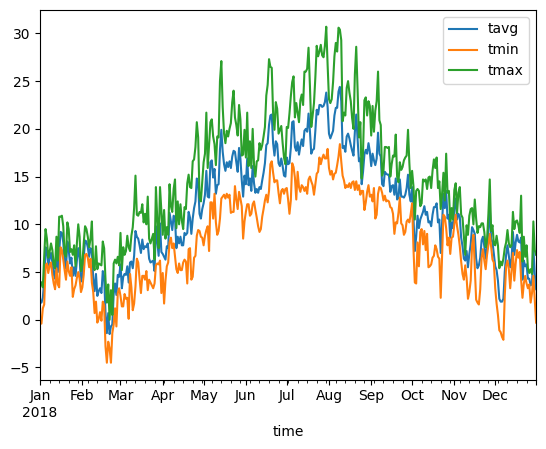

In [3]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [4]:
from meteostat import Hourly

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31, 23, 59)

# Get hourly data
data = Hourly('72219', start, end)
data = data.fetch()

#Print DataFrame
print(data)

                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2018-01-01 00:00:00   0.6  -5.6  63.0   NaN   NaN  340.0  18.4   NaN  1024.6   
2018-01-01 01:00:00  -1.1  -6.6  66.0   0.0   NaN  320.0  16.6   NaN  1025.4   
2018-01-01 02:00:00  -1.1  -9.5  53.0   0.0   NaN  330.0  22.3   NaN  1025.8   
2018-01-01 03:00:00  -1.1 -10.0  51.0   0.0   NaN  330.0  25.9   NaN  1025.6   
2018-01-01 04:00:00  -1.7 -10.5  51.0   0.0   NaN  340.0  18.4   NaN  1026.1   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2018-12-31 19:00:00  20.0  17.2  84.0   0.0   NaN  200.0  18.4   NaN  1016.5   
2018-12-31 20:00:00  21.1  16.7  76.0   0.0   NaN  190.0  22.3   NaN  1015.8   
2018-12-31 21:00:00  21.1  16.1  73.0   0.0   NaN  180.0  27.7   NaN  1014.7   
2018-12-31 22:00:00  21.1  15.0  68.0   0.0   NaN  190.0  27.7   NaN  1015.7   
2018-12-31 23:00:00  20.0  15.0  73.0   

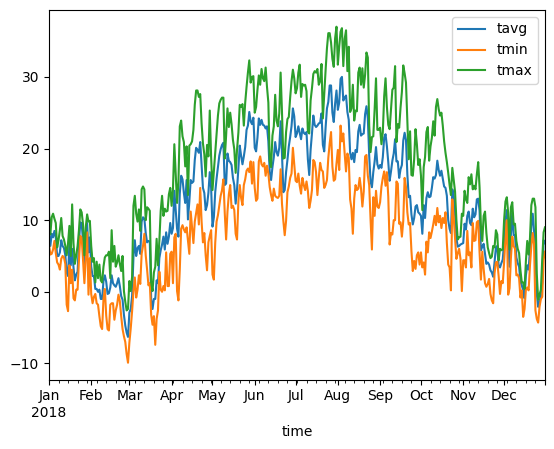

In [5]:
# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Get daily data for 2018
data = Daily('10637', start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

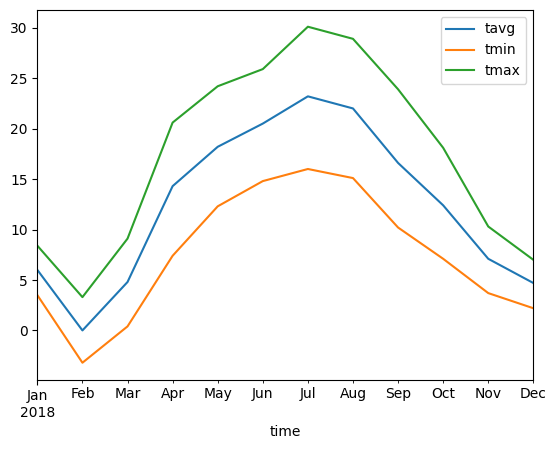

In [9]:
#Import Meteostat library and dependencies Monthly
from meteostat import Stations, Monthly

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Get daily data for 2018
data = Monthly('10637', start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

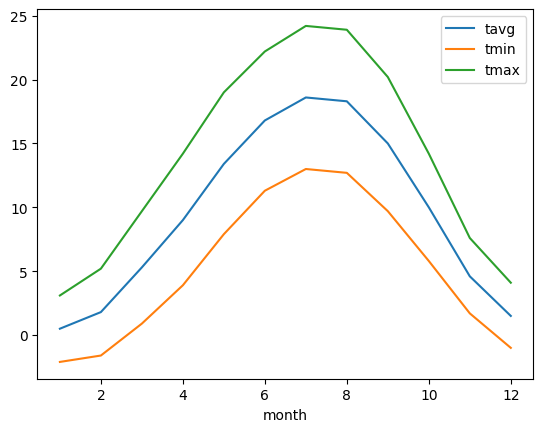

In [8]:
#Import Meteostat library and dependencies Monthly
from meteostat import Normals

# Get daily data for 2018
data = Normals('10637', 1961, 1990)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

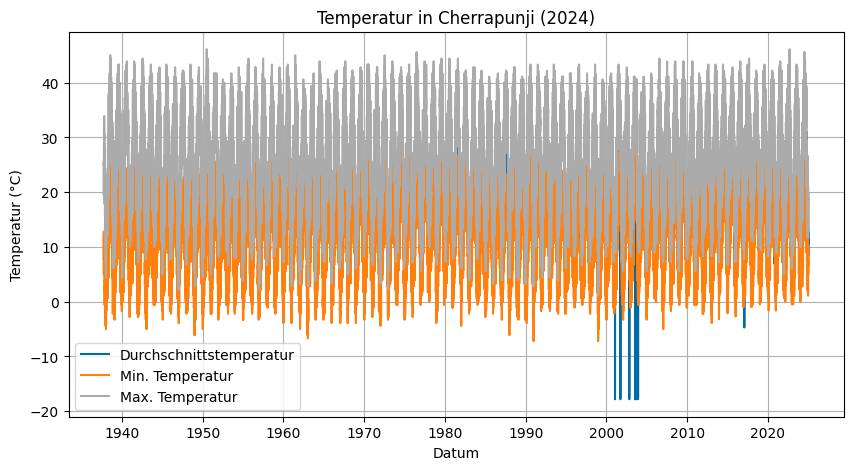

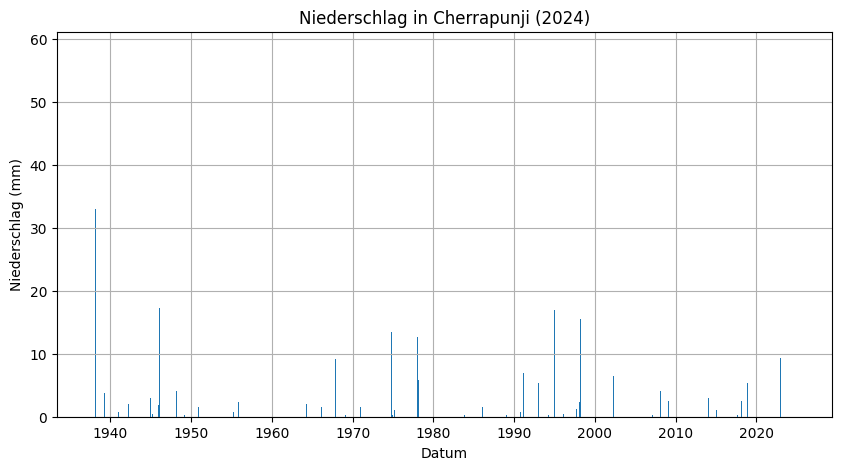

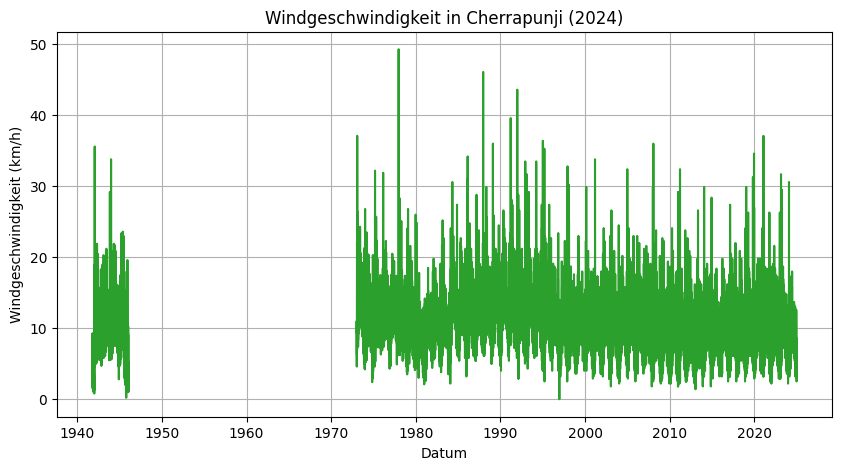

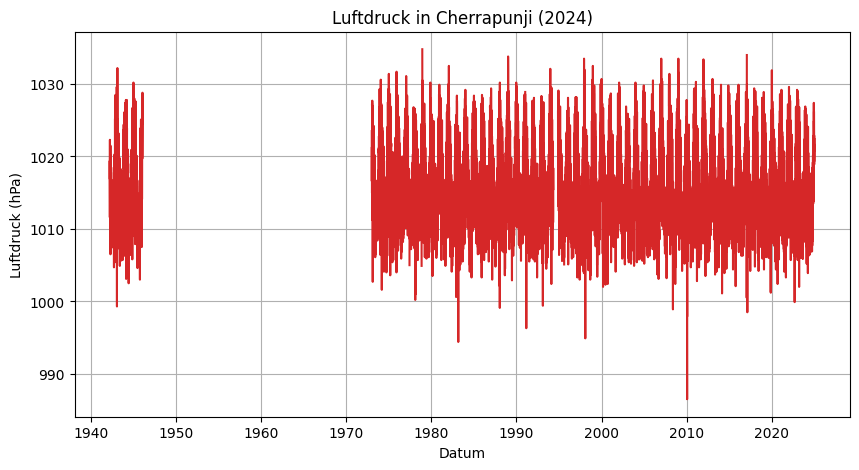

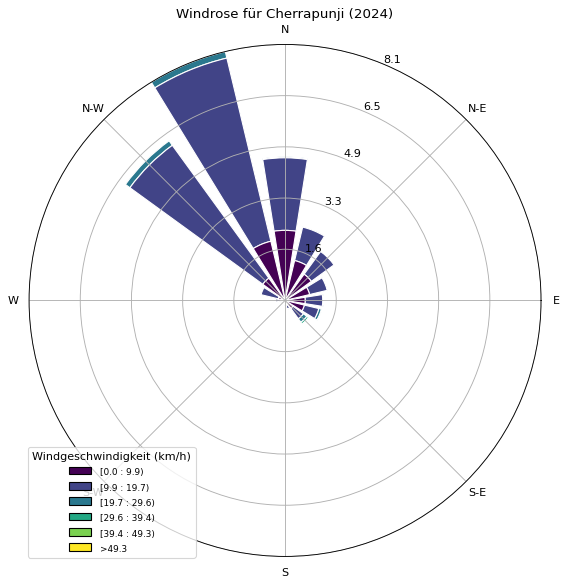

In [17]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from windrose import WindroseAxes

# Set time period
start = datetime(1850, 1, 1)
end = datetime(2024, 12, 31)

# Create Point for Cherrapunji, India
cherrapunji = Point(35.3733, -119.0187)  # Include elevation if needed

# Get daily data
data = Daily(cherrapunji, start, end)
data = data.fetch()

# Farbenblind-freundliche Farben
plt.style.use('tableau-colorblind10')

# Temperaturdiagramm
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['tavg'], label='Durchschnittstemperatur')
plt.plot(data.index, data['tmin'], label='Min. Temperatur')
plt.plot(data.index, data['tmax'], label='Max. Temperatur')
plt.xlabel('Datum')
plt.ylabel('Temperatur (°C)')
plt.title('Temperatur in Cherrapunji (2024)')
plt.legend()
plt.grid(True)
plt.show()

# Niederschlagsdiagramm
plt.figure(figsize=(10, 5))
plt.bar(data.index, data['prcp'], color='tab:blue')
plt.xlabel('Datum')
plt.ylabel('Niederschlag (mm)')
plt.title('Niederschlag in Cherrapunji (2024)')
plt.grid(True)
plt.show()

# Windgeschwindigkeit
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['wspd'], color='tab:green')
plt.xlabel('Datum')
plt.ylabel('Windgeschwindigkeit (km/h)')
plt.title('Windgeschwindigkeit in Cherrapunji (2024)')
plt.grid(True)
plt.show()

# Luftdruck
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['pres'], color='tab:red')
plt.xlabel('Datum')
plt.ylabel('Luftdruck (hPa)')
plt.title('Luftdruck in Cherrapunji (2024)')
plt.grid(True)  
plt.show()

# Windrosen-Diagramm
ax = WindroseAxes.from_ax()
ax.bar(data['wdir'], data['wspd'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Windgeschwindigkeit (km/h)')
plt.title('Windrose für Cherrapunji (2024)')
plt.show()


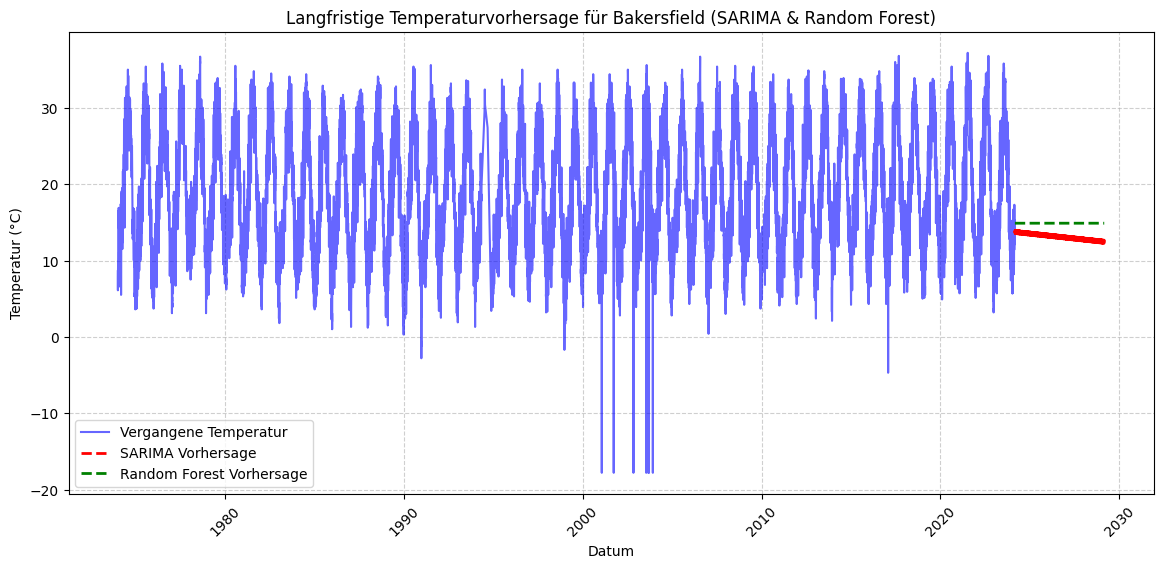

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from datetime import datetime, timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings("ignore")

# Zeitraum für Vergangenheitsdaten (letzte 50 Jahre, falls verfügbar)
start_date = datetime(1974, 1, 1)
end_date = datetime(2024, 3, 1)

# Punkt für Bakersfield, USA
location = Point(35.3733, -119.0187)

# Daten von Meteostat API abrufen
data = Daily(location, start_date, end_date)
data = data.fetch()

# Sicherstellen, dass das Datum der Index ist
data.index = pd.to_datetime(data.index)

# Fehlende Werte behandeln
data['tavg'] = data['tavg'].interpolate(method='linear')  # Lücken in Temperaturdaten füllen
data[['tmin', 'tmax', 'prcp', 'wspd', 'pres']] = data[['tmin', 'tmax', 'prcp', 'wspd', 'pres']].fillna(method='ffill')

data['year'] = data.index.year

temperature_series = data['tavg'].dropna()

# Trainings- und Testsplit
train_size = int(len(temperature_series) * 0.8)
train, test = temperature_series.iloc[:train_size], temperature_series.iloc[train_size:]

# SARIMA-Modell trainieren
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Langfristige Vorhersage für 5 Jahre
forecast_steps = 5 * 365  # 5 Jahre
future_dates = pd.date_range(start=end_date, periods=forecast_steps, freq='D')
sarima_forecast = sarima_result.forecast(steps=forecast_steps)

# Random Forest Modell mit zusätzlichen Wetterfaktoren
features = data[['tmin', 'tmax', 'prcp', 'wspd', 'pres']].fillna(method='ffill')
target = data['tavg'].fillna(method='ffill')

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Vorhersage mit Random Forest für 5 Jahre (Zukunftswerte mit Durchschnitt auffüllen)
future_features = pd.concat([features.iloc[-1:].copy()]*forecast_steps, ignore_index=True)
rf_forecast = rf_model.predict(future_features)

# Ergebnisse visualisieren
plt.figure(figsize=(14, 6))
plt.plot(temperature_series.index, temperature_series, label="Vergangene Temperatur", color="blue", alpha=0.6)
plt.plot(future_dates, sarima_forecast, label="SARIMA Vorhersage", color="red", linestyle="dashed", linewidth=2)
plt.plot(future_dates, rf_forecast, label="Random Forest Vorhersage", color="green", linestyle="dashed", linewidth=2)
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.title("Langfristige Temperaturvorhersage für Bakersfield (SARIMA & Random Forest)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

Verfügbarer Zeitraum: 1980-01-01 00:00:00 bis 2024-03-01 00:00:00
Fehlende Werte nach Verarbeitung: 0


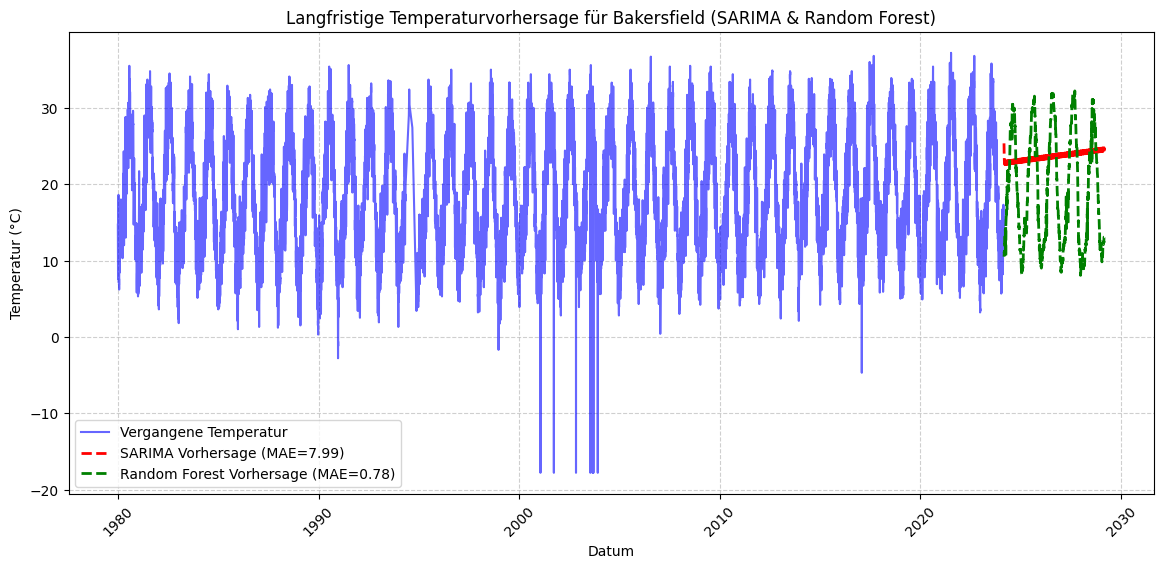

(count    16132.000000
 mean        18.754166
 std          7.923632
 min        -17.800000
 25%         12.200000
 50%         18.100000
 75%         25.700000
 max         37.200000
 Name: tavg, dtype: float64,
 7.992785904540306,
 0.7768993172104991)

In [24]:
warnings.filterwarnings("ignore")

# Zeitraum für Vergangenheitsdaten (letzte 50 Jahre, falls verfügbar)
start_date = datetime(1980, 1, 1)  # Statt 1940, um Lücken zu vermeiden
end_date = datetime(2024, 3, 1)

# Punkt für Bakersfield, USA
location = Point(35.3733, -119.0187)

# Daten von Meteostat API abrufen
data = Daily(location, start_date, end_date).fetch()

# Sicherstellen, dass das Datum der Index ist
data.index = pd.to_datetime(data.index)

# Überprüfen, ob Meteostat-Daten verfügbar sind
print("Verfügbarer Zeitraum:", data.index.min(), "bis", data.index.max())

# Fehlende Werte in der Temperaturspalte behandeln
data['tavg'] = data['tavg'].interpolate(method='linear')  # Interpolieren
data['tavg'] = data['tavg'].fillna(method='bfill').fillna(method='ffill')  # Backfill + Forwardfill als zusätzliche Sicherung

# Prüfen, ob noch NaN-Werte vorhanden sind
print("Fehlende Werte nach Verarbeitung:", data['tavg'].isna().sum())

# Fehlende Werte in weiteren Wettervariablen auffüllen
data[['tmin', 'tmax', 'prcp', 'wspd', 'pres']] = data[['tmin', 'tmax', 'prcp', 'wspd', 'pres']].fillna(method='ffill').fillna(method='bfill')

# Temperatur-Zeitreihe extrahieren
temperature_series = data['tavg'].dropna()

# Trainings- und Testsplit
train_size = int(len(temperature_series) * 0.8)
train, test = temperature_series.iloc[:train_size], temperature_series.iloc[train_size:]

# SARIMA-Modell trainieren
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Langfristige Vorhersage für 5 Jahre
forecast_steps = 5 * 365  # 5 Jahre
future_dates = pd.date_range(start=end_date, periods=forecast_steps, freq='D')
sarima_forecast = sarima_result.forecast(steps=forecast_steps)

# Random Forest Modell mit zusätzlichen Wetterfaktoren
features = data[['tmin', 'tmax', 'prcp', 'wspd', 'pres']].fillna(method='ffill').fillna(method='bfill')
target = data['tavg'].fillna(method='ffill').fillna(method='bfill')

# Überprüfung der Datenverteilung im Trainingsdatensatz
train_stats = target.describe()

# Trainings- und Testdaten für Random Forest
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Random Forest Modell optimieren
rf_model = RandomForestRegressor(n_estimators=500, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Überprüfung: Sind future_features konstant?
future_features = features.rolling(window=30, min_periods=1).mean().iloc[-forecast_steps:].reset_index(drop=True)

# Falls zu wenige Werte vorhanden sind, mit Durchschnittswerten auffüllen
if future_features.shape[0] < forecast_steps:
    additional_rows = pd.DataFrame(np.tile(future_features.mean().values, (forecast_steps - future_features.shape[0], 1)), columns=future_features.columns)
    future_features = pd.concat([future_features, additional_rows], ignore_index=True)

# Random Forest Vorhersage
rf_forecast = rf_model.predict(future_features)

# Berechnung von Fehlerwerten
sarima_mae = mean_absolute_error(test, sarima_result.forecast(steps=len(test)))
rf_mae = mean_absolute_error(y_test, rf_model.predict(X_test))

# Ergebnisse visualisieren
plt.figure(figsize=(14, 6))
plt.plot(temperature_series.index, temperature_series, label="Vergangene Temperatur", color="blue", alpha=0.6)
plt.plot(future_dates, sarima_forecast, label=f"SARIMA Vorhersage (MAE={sarima_mae:.2f})", color="red", linestyle="dashed", linewidth=2)
plt.plot(future_dates, rf_forecast, label=f"Random Forest Vorhersage (MAE={rf_mae:.2f})", color="green", linestyle="dashed", linewidth=2)
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.title("Langfristige Temperaturvorhersage für Bakersfield (SARIMA & Random Forest)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

# Rückgabe der wichtigsten Werte
train_stats, sarima_mae, rf_mae

Verfügbarer Zeitraum: 1975-01-01 00:00:00 bis 2024-03-01 00:00:00
Fehlende Werte nach Verarbeitung: 0


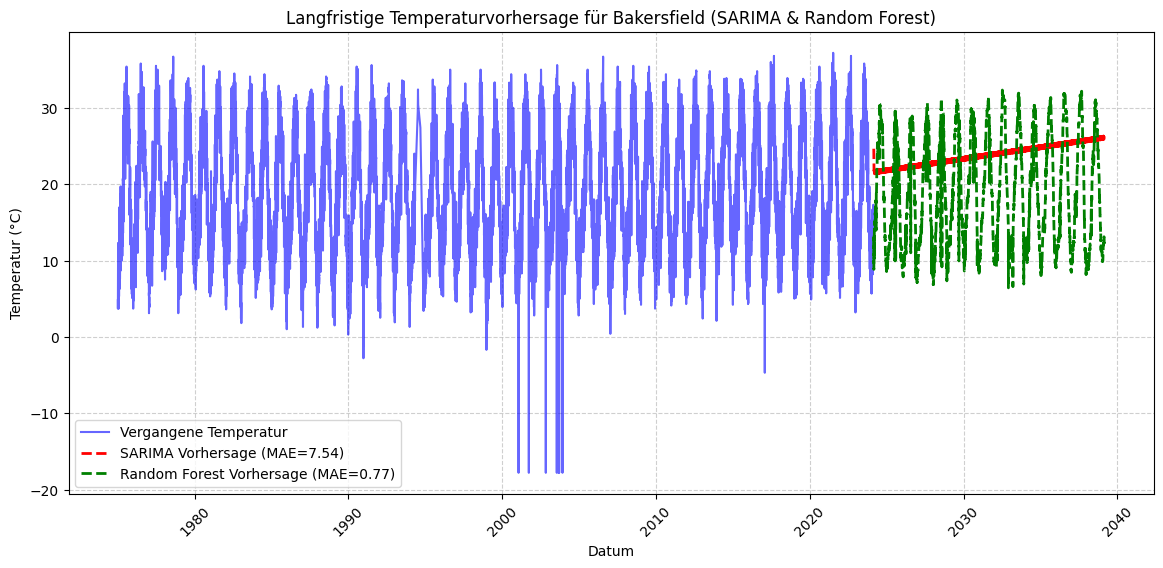

(count    17958.000000
 mean        18.827809
 std          7.919320
 min        -17.800000
 25%         12.200000
 50%         18.200000
 75%         25.800000
 max         37.200000
 Name: tavg, dtype: float64,
 7.538078243283039,
 0.7652837976426105)

In [26]:
warnings.filterwarnings("ignore")

# Zeitraum für Vergangenheitsdaten (letzte 50 Jahre, falls verfügbar)
start_date = datetime(1975, 1, 1)  # Statt 1940, um Lücken zu vermeiden
end_date = datetime(2024, 3, 1)

# Punkt für Bakersfield, USA
location = Point(35.3733, -119.0187)

# Daten von Meteostat API abrufen
data = Daily(location, start_date, end_date).fetch()

# Sicherstellen, dass das Datum der Index ist
data.index = pd.to_datetime(data.index)

# Überprüfen, ob Meteostat-Daten verfügbar sind
print("Verfügbarer Zeitraum:", data.index.min(), "bis", data.index.max())

# Fehlende Werte in der Temperaturspalte behandeln
data['tavg'] = data['tavg'].interpolate(method='linear')  # Interpolieren
data['tavg'] = data['tavg'].fillna(method='bfill').fillna(method='ffill')  # Backfill + Forwardfill als zusätzliche Sicherung

# Prüfen, ob noch NaN-Werte vorhanden sind
print("Fehlende Werte nach Verarbeitung:", data['tavg'].isna().sum())

# Fehlende Werte in weiteren Wettervariablen auffüllen
data[['tmin', 'tmax', 'prcp', 'wspd', 'pres']] = data[['tmin', 'tmax', 'prcp', 'wspd', 'pres']].fillna(method='ffill').fillna(method='bfill')

# Temperatur-Zeitreihe extrahieren
temperature_series = data['tavg'].dropna()

# Trainings- und Testsplit
train_size = int(len(temperature_series) * 0.8)
train, test = temperature_series.iloc[:train_size], temperature_series.iloc[train_size:]

# SARIMA-Modell trainieren
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Langfristige Vorhersage für 5 Jahre
forecast_steps = 15 * 365  # 5 Jahre
future_dates = pd.date_range(start=end_date, periods=forecast_steps, freq='D')
sarima_forecast = sarima_result.forecast(steps=forecast_steps)

# Random Forest Modell mit zusätzlichen Wetterfaktoren
features = data[['tmin', 'tmax', 'prcp', 'wspd', 'pres']].fillna(method='ffill').fillna(method='bfill')
target = data['tavg'].fillna(method='ffill').fillna(method='bfill')

# Überprüfung der Datenverteilung im Trainingsdatensatz
train_stats = target.describe()

# Trainings- und Testdaten für Random Forest
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Random Forest Modell optimieren
rf_model = RandomForestRegressor(n_estimators=500, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Überprüfung: Sind future_features konstant?
future_features = features.rolling(window=30, min_periods=1).mean().iloc[-forecast_steps:].reset_index(drop=True)

# Falls zu wenige Werte vorhanden sind, mit Durchschnittswerten auffüllen
if future_features.shape[0] < forecast_steps:
    additional_rows = pd.DataFrame(np.tile(future_features.mean().values, (forecast_steps - future_features.shape[0], 1)), columns=future_features.columns)
    future_features = pd.concat([future_features, additional_rows], ignore_index=True)

# Random Forest Vorhersage
rf_forecast = rf_model.predict(future_features)

# Berechnung von Fehlerwerten
sarima_mae = mean_absolute_error(test, sarima_result.forecast(steps=len(test)))
rf_mae = mean_absolute_error(y_test, rf_model.predict(X_test))

# Ergebnisse visualisieren
plt.figure(figsize=(14, 6))
plt.plot(temperature_series.index, temperature_series, label="Vergangene Temperatur", color="blue", alpha=0.6)
plt.plot(future_dates, sarima_forecast, label=f"SARIMA Vorhersage (MAE={sarima_mae:.2f})", color="red", linestyle="dashed", linewidth=2)
plt.plot(future_dates, rf_forecast, label=f"Random Forest Vorhersage (MAE={rf_mae:.2f})", color="green", linestyle="dashed", linewidth=2)
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.title("Langfristige Temperaturvorhersage für Bakersfield (SARIMA & Random Forest)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

# Rückgabe der wichtigsten Werte
train_stats, sarima_mae, rf_mae

ADF-Test p-Wert: 5.424259971513863e-18
Zeitreihe ist stationär


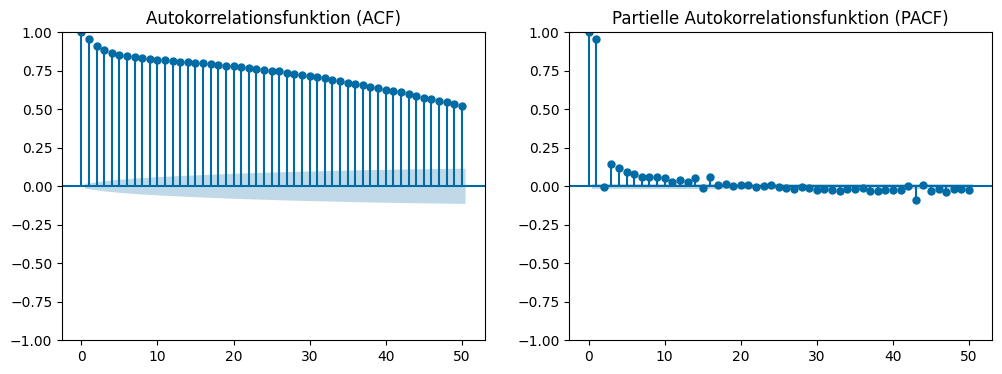

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Zeitraum für die Vergangenheitsdaten
start_date = datetime(1980, 1, 1)
end_date = datetime(2024, 3, 1)

# Standort für Bakersfield, USA
location = Point(35.3733, -119.0187)

# Wetterdaten abrufen
data = Daily(location, start_date, end_date).fetch()

# Datum als Index setzen
data.index = pd.to_datetime(data.index)
data = data.sort_index()

# Fehlende Werte behandeln
data['tavg'] = data['tavg'].interpolate(method='linear')

# Stationaritätsprüfung mit ADF-Test
adf_test = adfuller(data['tavg'].dropna())
print(f"ADF-Test p-Wert: {adf_test[1]}")
if adf_test[1] < 0.05:
    print("Zeitreihe ist stationär")
else:
    print("Zeitreihe ist nicht stationär. Eine Differenzierung könnte nötig sein.")

# Autokorrelationsfunktion (ACF) und partielle Autokorrelationsfunktion (PACF) plotten
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(data['tavg'].dropna(), ax=axes[0], lags=50)
axes[0].set_title("Autokorrelationsfunktion (ACF)")
plot_pacf(data['tavg'].dropna(), ax=axes[1], lags=50)
axes[1].set_title("Partielle Autokorrelationsfunktion (PACF)")
plt.show()

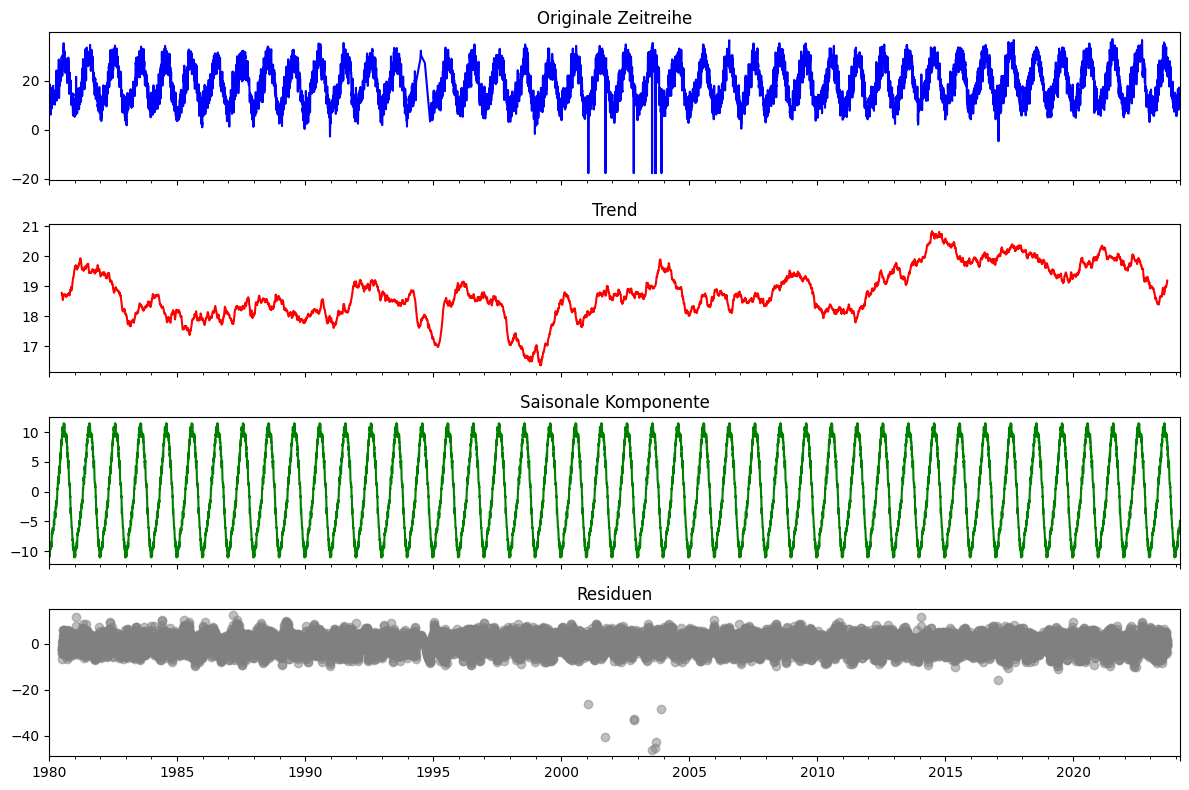

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

# Zeitraum für die Vergangenheitsdaten
start_date = datetime(1980, 1, 1)
end_date = datetime(2024, 3, 1)

# Standort für Bakersfield, USA
location = Point(35.3733, -119.0187)

# Wetterdaten abrufen
data = Daily(location, start_date, end_date).fetch()

# Datum als Index setzen
data.index = pd.to_datetime(data.index)
data = data.sort_index()

# Fehlende Werte behandeln
data['tavg'] = data['tavg'].interpolate(method='linear')

# Saisonale Dekomposition durchführen
decomposed = seasonal_decompose(data['tavg'], model='additive', period=365)

# Ergebnisse visualisieren
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

data['tavg'].plot(ax=axes[0], title='Originale Zeitreihe', color='blue')
decomposed.trend.plot(ax=axes[1], title='Trend', color='red')
decomposed.seasonal.plot(ax=axes[2], title='Saisonale Komponente', color='green')
axes[3].scatter(data.index, decomposed.resid, color='gray', alpha=0.5)
axes[3].set_title('Residuen')

plt.tight_layout()
plt.show()

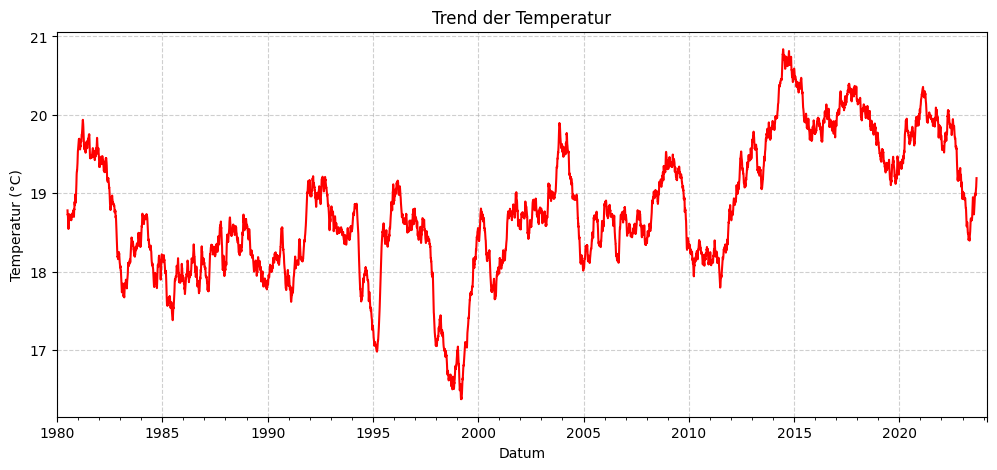

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

# Zeitraum für die Vergangenheitsdaten
start_date = datetime(1980, 1, 1)
end_date = datetime(2024, 3, 1)

# Standort für Bakersfield, USA
location = Point(35.3733, -119.0187)

# Wetterdaten abrufen
data = Daily(location, start_date, end_date).fetch()

# Datum als Index setzen
data.index = pd.to_datetime(data.index)
data = data.sort_index()

# Fehlende Werte behandeln
data['tavg'] = data['tavg'].interpolate(method='linear')

# Saisonale Dekomposition durchführen
decomposed = seasonal_decompose(data['tavg'], model='additive', period=365)

# Nur den Trend plotten
plt.figure(figsize=(12, 5))
decomposed.trend.plot(title='Trend der Temperatur', color='red')
plt.xlabel('Datum')
plt.ylabel('Temperatur (°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()